# 78 子集问题
输入：不含重复元素的整数数组nums  
输出：该数组所有可能的子集

注意：空集是任何集合的子集

## 思路
子集问题需要找出子集的所有情况，因此长度是不固定的，不像组合问题和分割问题收集叶子节点即可  

因此子集问题需要找到树的所有节点

注意：子集是无序的，取过的元素不用再取一遍了  
- {1,2} 和 {2,1} 是相同的一种子集

### 有序 vs 无序
- 有序问题：排列问题，{1,2} 和 {2,1} 是不同的情况
  - 此时的回溯算法for循环要从0开始，也就是说可以往前重复取

- 无序问题：求子集的情况  
  - 取过的元素不会回头再取了
  - 例如 1，2，3，4，5 的数组，第一次从1开始往后取，第二次就只能从2开始往后了，不可以回头取重复的元素

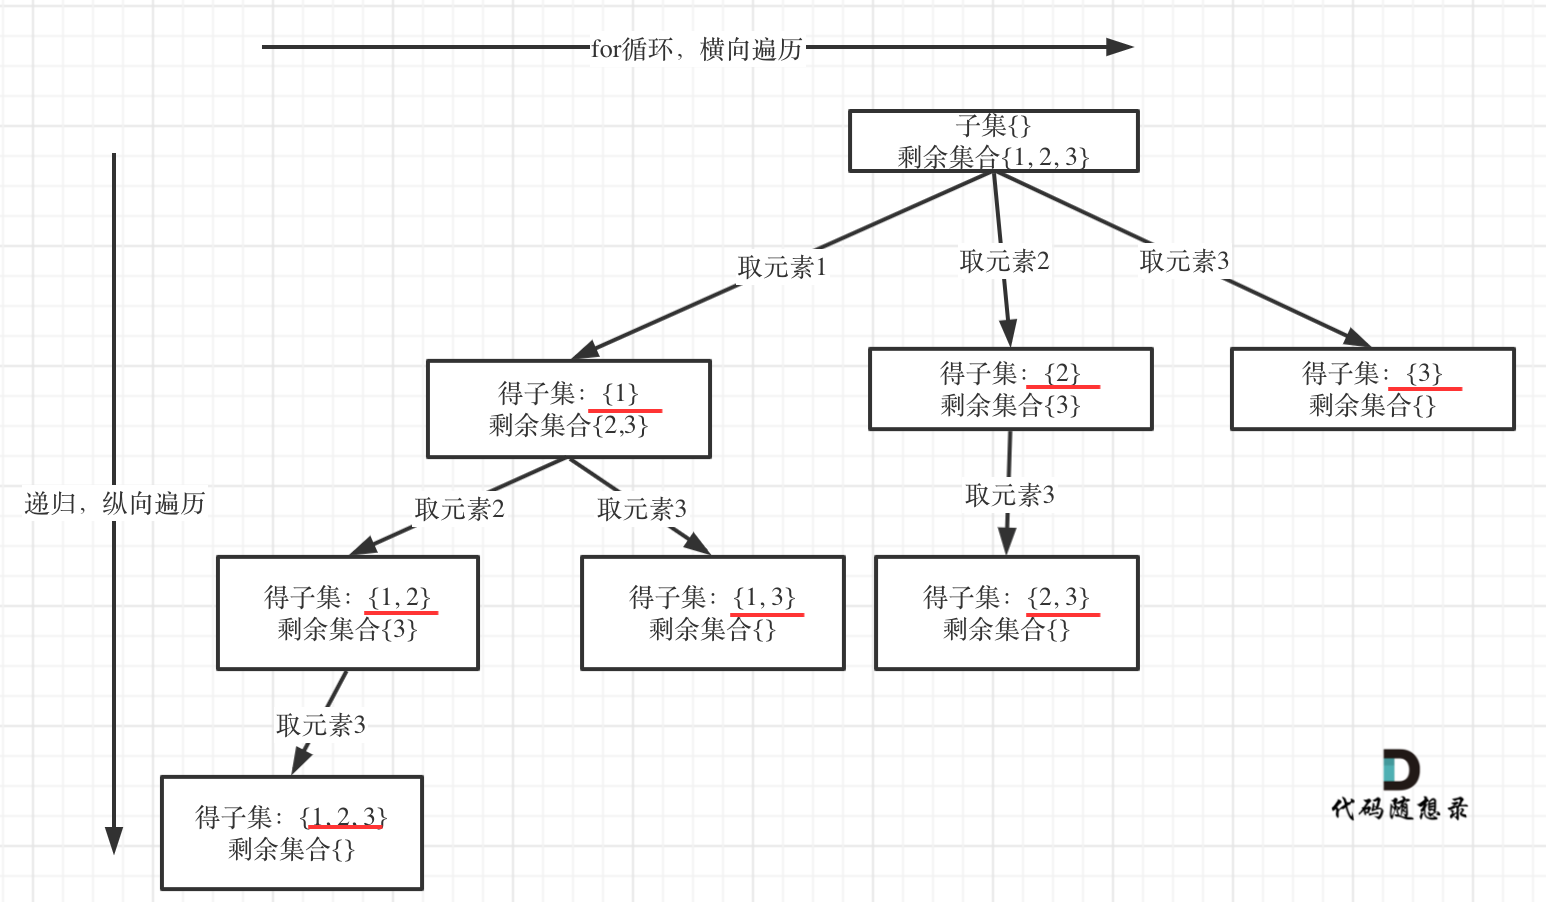

## 回溯三部曲
1. 递归函数参数
   - 全局变量：path收集子集元素，result存放子集的组合
   - 其他参数：每次取元素的位置startIndex

2. 终止条件
   - 每次当剩余集合为空时，说明此次for循环已经到底了（叶子节点）  
   - 剩余集合为空： startIndex > len(nums)

3. 单层搜索逻辑
   - 按照模板：节点处理 - 递归遍历 - 回溯撤销
   - 当前节点处理：加入路径手机元素
   - 递归遍历：从当前元素下一个位置开始取 i+1
   - 回溯撤销：对应节点处理，从路径中删除当前元素

ps：求子集问题需要遍历整棵树，因此**无需任何剪枝**

In [ ]:
class Solution:
    def backtracing(self, nums, startIndex, path, result):
        result.append(path[:])    # 先收集当前路径上的子集，放在终止条件判断之前，否则会漏掉自己（空集和原集）
        
        if startIndex >= len(nums):
            return
        
        for i in range(startIndex, len(nums)):
            path.append(nums[i])
            self.backtracing(nums, i+1, path, result)
            path.pop()
    
    def subsets(self, nums):
        result = []
        path = []
        self.backtracing(nums, 0, path, result)
        return result